<a href="https://colab.research.google.com/github/Renukaamarapalli/Renukaamarapalli/blob/main/Copy_of_face_mask_image_classificationV2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
from imutils import paths
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
withMaskPath = "/content/drive/MyDrive/dataset/Correct"
withoutMaskPath = "/content/drive/MyDrive/dataset/NoMask"
incorrectMaskPath = "/content/drive/MyDrive/dataset/Incorrect"
classes = ['withoutMask','witMask', 'Incorrect']

In [ ]:
withMaskImagePaths = list(paths.list_images(withMaskPath))
withoutMaskImagePaths = list(paths.list_images(withoutMaskPath))
incorrectMaskImagePaths = list(paths.list_images(incorrectMaskPath))
print(withMaskImagePaths[:10])

['/content/drive/MyDrive/dataset/Correct/1.jpg', '/content/drive/MyDrive/dataset/Correct/0.jpg', '/content/drive/MyDrive/dataset/Correct/10.jpg', '/content/drive/MyDrive/dataset/Correct/100.jpg', '/content/drive/MyDrive/dataset/Correct/11.jpg', '/content/drive/MyDrive/dataset/Correct/12.jpg', '/content/drive/MyDrive/dataset/Correct/13.jpg', '/content/drive/MyDrive/dataset/Correct/14.jpg', '/content/drive/MyDrive/dataset/Correct/15.jpg', '/content/drive/MyDrive/dataset/Correct/16.jpg']


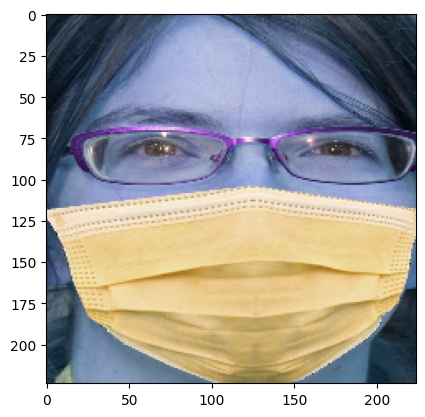

In [ ]:
for imagePath in withMaskImagePaths:
  imageArray = cv2.imread(imagePath)
  plt.imshow(imageArray)
  plt.show()
  break

(224, 224, 3)


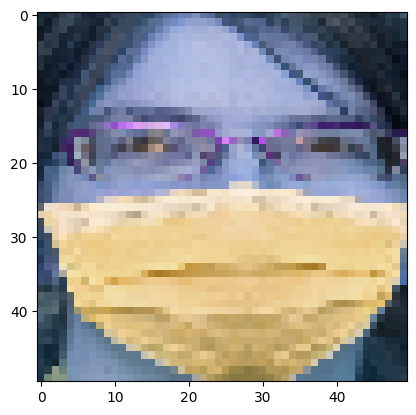

In [ ]:
print(imageArray.shape)
imageSize = 50
newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
newImageArray.shape
plt.imshow(newImageArray)
plt.show()

In [ ]:
x=[]
print('length of with mask data',len(withMaskImagePaths))
print('length of without mask data',len(withoutMaskImagePaths))
combinedDataset = withMaskImagePaths + withoutMaskImagePaths + incorrectMaskImagePaths
print('length of combined dataset:',len(combinedDataset))

for imagePath in combinedDataset:
  print('imagePath:', imagePath)
  imageArray = cv2.imread(imagePath)
  imageSize = 50
  newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
  x.append(newImageArray)

length of with mask data 101
length of without mask data 100
length of combined dataset: 302
imagePath: /content/drive/MyDrive/dataset/Correct/1.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/0.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/10.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/100.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/11.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/12.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/13.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/14.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/15.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/16.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/17.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/21.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/20.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/18.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/2.jpg
imagePath: /content/drive/MyDrive/dataset/Correct/19.j

In [ ]:
print('length of x:', len(x))
y = np.array([1]*len(withMaskImagePaths) + [0]*len(withoutMaskImagePaths)+ [2]*len(incorrectMaskImagePaths))
x = np.array(x)
print('length of y:', len(y))
print('shape of x:', x.shape)
print('shape of y:', y.shape)

length of x: 302
length of y: 302
shape of x: (302, 50, 50, 3)
shape of y: (302,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=1)
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (211, 50, 50, 3)
y_train shape (211,)
x_test shape (91, 50, 50, 3)
y_test shape (91,)


In [ ]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(50, 50, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(3)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
7/7 [==============================] - 3s 170ms/step - loss: 1.0226 - accuracy: 0.4360
Epoch 2/10
7/7 [==============================] - 1s 155ms/step - loss: 0.5650 - accuracy: 0.8910
Epoch 3/10
7/7 [==============================] - 1s 158ms/step - loss: 0.1561 - accuracy: 0.9763
Epoch 4/10
7/7 [==============================] - 1s 137ms/step - loss: 0.1198 - accuracy: 0.9716
Epoch 5/10
7/7 [==============================] - 1s 83ms/step - loss: 0.0984 - accuracy: 0.9668
Epoch 6/10
7/7 [==============================] - 1s 88ms/step - loss: 0.0688 - accuracy: 0.9810
Epoch 7/10
7/7 [==============================] - 1s 114ms/step - loss: 0.0525 - accuracy: 0.9763
Epoch 8/10
7/7 [==============================] - 1s 180ms/step - loss: 0.0517 - accuracy: 0.9810
Epoch 9/10
7/7 [==============================] - 1s 133ms/step - loss: 0.0448 - accuracy: 0.9905
Epoch 10/10
7/7 [==============================] - 1s 82ms/step - loss: 0.0330 - accuracy: 0.9858


In [ ]:
model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 30ms/step - loss: 0.0932 - accuracy: 0.9780


[0.09324523061513901, 0.9780219793319702]

In [ ]:
y_preds = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_preds]
print('classfication report:' , classification_report(y_test, y_pred_classes))

3/3 [==============================] - 0s 27ms/step
classfication report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.93      0.96        29
           2       0.93      1.00      0.96        25

    accuracy                           0.98        91
   macro avg       0.98      0.98      0.98        91
weighted avg       0.98      0.98      0.98        91



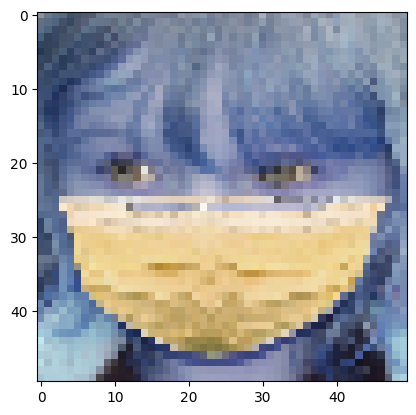

1/1 [==============================] - 0s 23ms/step
prediction: witMask


In [ ]:
imageArray = cv2.imread(withMaskImagePaths[2])
newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
plt.imshow(newImageArray)
plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classes[index])

In [ ]:
model.save('/content/drive/MyDrive/face-mask-image-classfication.h5')

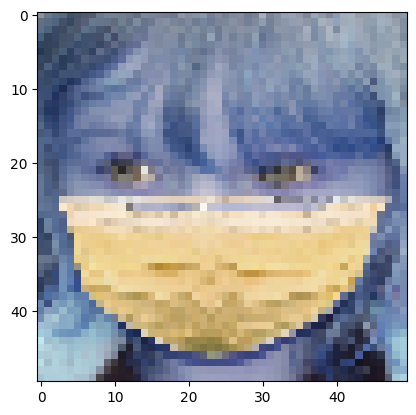

1/1 [==============================] - 0s 137ms/step
prediction: witMask


In [ ]:
new_model = tf.keras.models.load_model('/content/face-mask-image-classfication.h5')
imageArray = cv2.imread(withMaskImagePaths[2])
newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
plt.imshow(newImageArray)
plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = new_model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classes[index])

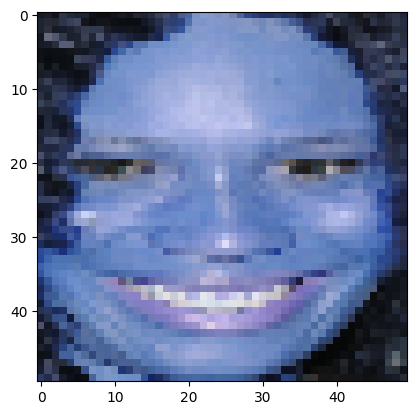

1/1 [==============================] - 0s 24ms/step
prediction: withoutMask


In [ ]:
imageArray = cv2.imread(withoutMaskImagePaths[2])
newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
plt.imshow(newImageArray)
plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = new_model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classes[index])

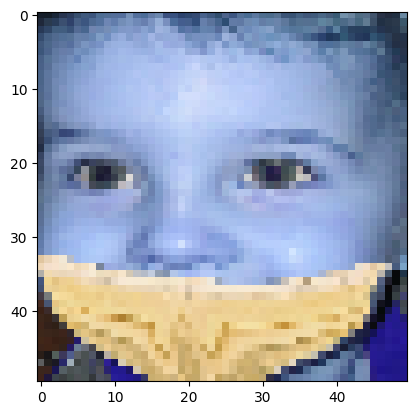

1/1 [==============================] - 0s 23ms/step
prediction: Incorrect


In [ ]:
imageArray = cv2.imread(incorrectMaskImagePaths[2])
newImageArray  = cv2.resize(imageArray, (imageSize, imageSize))
plt.imshow(newImageArray)
plt.show()
image = np.array(newImageArray, dtype="float32")
image= np.expand_dims(image, axis=0)
prediction  = new_model.predict(image)
index = np.argmax(prediction[0],axis=0)
print('prediction:', classes[index])